In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
df=pd.read_csv('SalaryData_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,...,python,r studio,excel,spark,city,state,hq_city,job_simp,job_title,num_comp
0,0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,...,1,0,1,0,Albuquerque,NM,Goleta,data scientist,na,0
1,1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,...,1,0,0,0,Linthicum,MD,Baltimore,data scientist,na,0
2,2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,...,1,0,1,1,Clearwater,FL,Clearwater,data scientist,na,0
3,3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,...,1,0,0,0,Richland,WA,Richland,data scientist,na,3
4,4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,...,1,0,1,0,New York,NY,New York,data scientist,na,3


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'min_sal', 'max_sal', 'avg_sal', 'python', 'r studio',
       'excel', 'spark', 'city', 'state', 'hq_city', 'job_simp', 'job_title',
       'num_comp'],
      dtype='object')

In [5]:
# Choosing the relevant columns
df_model=df[['avg_sal','Rating','Size','Type of ownership','Location','Founded','Industry','Sector','Revenue',
          'python', 'r studio','excel', 'spark', 'city', 'state', 'hq_city', 'job_simp', 'job_title','num_comp']]

df_model.head()

,avg_sal,Rating,Size,Type of ownership,Location,Founded,Industry,Sector,Revenue,python,r studio,excel,spark,city,state,hq_city,job_simp,job_title,num_comp
0,72.0,3.8,501 to 1000 employees,Company - Private,"Albuquerque, NM",1973,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,0,1,0,Albuquerque,NM,Goleta,data scientist,na,0
1,87.5,3.4,10000+ employees,Other Organization,"Linthicum, MD",1984,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,0,0,0,Linthicum,MD,Baltimore,data scientist,na,0
2,85.0,4.8,501 to 1000 employees,Company - Private,"Clearwater, FL",2010,Security Services,Business Services,$100 to $500 million (USD),1,0,1,1,Clearwater,FL,Clearwater,data scientist,na,0
3,76.5,3.8,1001 to 5000 employees,Government,"Richland, WA",1965,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),1,0,0,0,Richland,WA,Richland,data scientist,na,3
4,114.5,2.9,51 to 200 employees,Company - Private,"New York, NY",1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,0,1,0,New York,NY,New York,data scientist,na,3


In [6]:
# Get the dummy data from pandas 
df_dummies=pd.get_dummies(df_model)
df_dummies.head()

,avg_sal,Rating,Founded,python,r studio,excel,spark,num_comp,Size_-1,Size_1 to 50 employees,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_ml,job_simp_na,job_title_junior,job_title_na,job_title_senior
0,72.0,3.8,1973,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,1984,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,2010,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,1965,1,0,0,0,3,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,1998,1,0,1,0,3,0,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
# train test split data for model
x=df_dummies.drop('avg_sal',axis=1)
y=df_dummies.avg_sal.values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm=LinearRegression()
lm.fit(x_train,y_train)

# Cross Validation
np.mean(cross_val_score(lm,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-40.6974875452191

In [9]:
# Lasso Regression
from sklearn.linear_model import Lasso

lm_l=Lasso()
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-21.407230909364788

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19926.183358273425, tolerance: 60.59305341772151
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.7469254338066, tolerance: 56.826356708860764
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9925.082164800591, tolerance: 57.224473989898996
  model = cd_fast.enet_coordinate_descent(


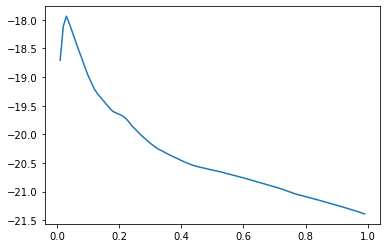

In [10]:
# Finding the different values of alpha and getting the best result from it
alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
    
plt.plot(alpha,error)

In [11]:
# Making the dataframe for the different alphas and errors for the Lasso regressions
err=list(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

# after getting the min. error for the lasso reg. , placing the value of alpha in the Lasso model

,alpha,error
2,0.03,-17.936654


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

np.mean(cross_val_score(rf,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

In [ ]:
# Since the Random Forrest regression gives us the best predicted value we can then tune the model with GridSearchCv
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':range(10,100,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_

In [ ]:
# predicting the test values of various models with best estimators
p_lm=lm.predict(x_test)
p_lml=lm_l.predict(x_test)
p_rf=gs.best_estimator_.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,p_lm),mean_absolute_error(y_test,p_lml),mean_absolute_error(y_test,p_rf))

In [ ]:
# We can see that our tuned random forest generates the least error in predicting the test values (around 12000 dollars)

In [ ]:
df.to_csv(r'Model_Salary_Estimator.csv')